# <center>Breast Cancer Classification on ResNext model</center>

### Dataset Download from kaggle 

[Link](https://www.kaggle.com/c/histopathologic-cancer-detection/data)

In [1]:
!ls

Model_comparison.ipynb
classification.ipynb
densenet_model.ipynb
models
resnet152.ipynb
resnet152_with_applied_paper.ipynb
resnext_model.ipynb
sample_submission.csv
submission_transferLearning_0.9872716665267944.csv
test
train
train_labels.csv


## Import packages

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
from torchvision.models import * 

import os
import matplotlib.pyplot as plt

## Exploratory data analysis

In [4]:
path = Path(".")
labels = pd.read_csv(path/"train_labels.csv")
labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [5]:
print(labels["label"].nunique()); classes = list(set(labels["label"])); classes

2


[0, 1]

### Class Distribution

In [6]:
for i in classes:
    print("Number of items in class {} is {}".format(i,len(labels[labels["label"] == i])))

Number of items in class 0 is 130908
Number of items in class 1 is 89117


## Data Visualisation

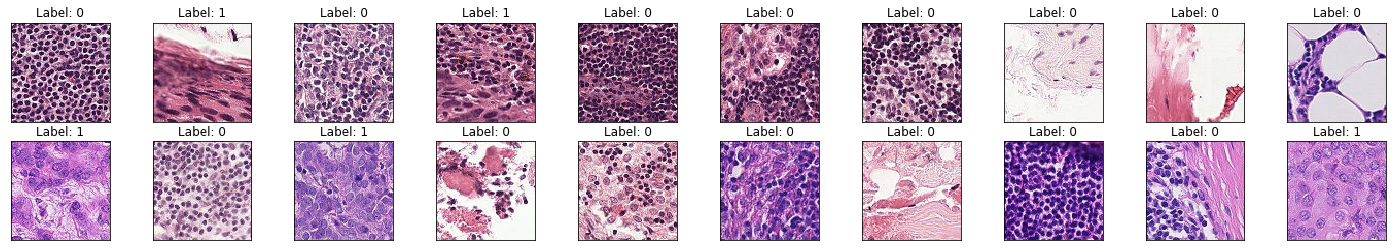

In [7]:
fig = plt.figure(figsize=(25, 4))
from PIL import Image as image_open
# display 20 images
train_imgs = os.listdir("./train")
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    im = image_open.open("./train/" + img)
    plt.imshow(im)
    lab = labels.loc[labels['id'] == img.split('.')[0], 'label'].values[0]
    ax.set_title(f'Label: {lab}')

## Data loading and preparation with data augmentation

### Transform image with flip, invert and zoom

In [8]:
tfms = get_transforms(do_flip = True,flip_vert = True,max_zoom = 1.1)

In [9]:
np.random.seed(123)
sz = 96
data = ImageDataBunch.from_csv(path, folder = 'train', csv_labels = "train_labels.csv",
                               test = 'test',suffix=".tif", size = sz,bs = 128,
                               ds_tfms = tfms)
data.path = pathlib.Path('.')
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (176020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
0,1,0,0,0
Path: .;

Valid: LabelList (44005 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
1,1,0,1,1
Path: .;

Test: LabelList (57458 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: EmptyLabelList
,,,,
Path: .

In [10]:
print(data.classes); data.c

[0, 1]


2

In [11]:
import fastai
fastai.__version__

'1.0.54'

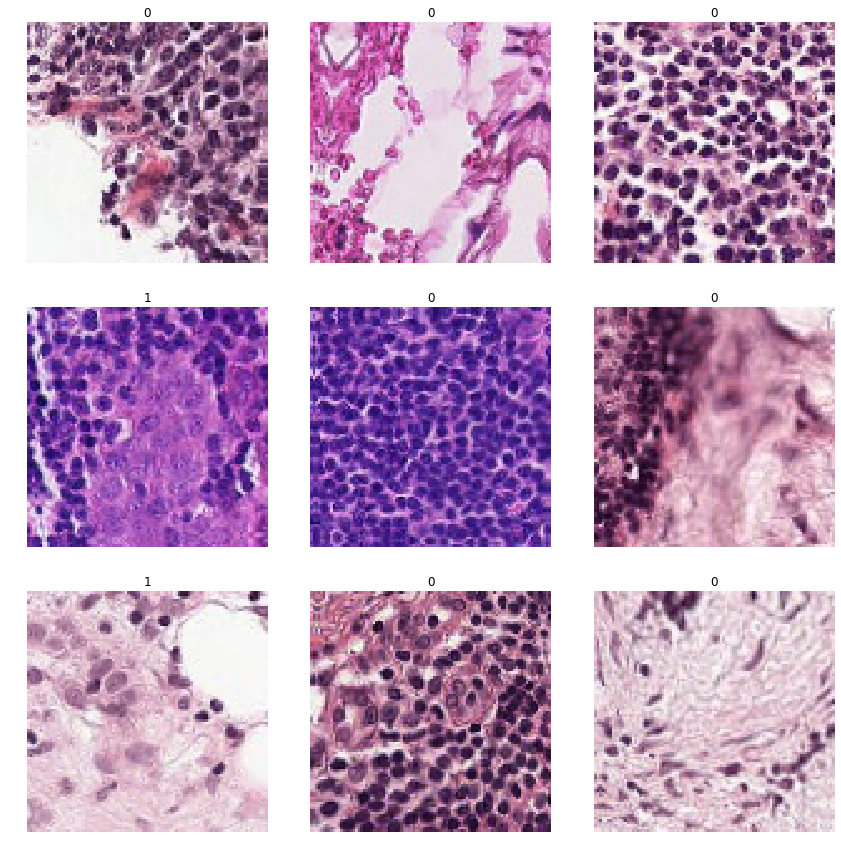

In [12]:
data.show_batch(rows = 3)

## Applying Model

### Model validation matrix - auc score

In [13]:
from sklearn.metrics import roc_auc_score

def auc_score(y_pred,y_true,tens=True):
    score = roc_auc_score(y_true,torch.sigmoid(y_pred)[:,1])
    if tens:
        score = tensor(score)
    return score

## Training model with 

### 1. ResNext


In [22]:
from fastai.basics import *

In [23]:
from torchvision.models import resnext50_32x4d as resnext
learn = cnn_learner(data,resnext,pretrained = True,ps = 0.5,metrics = [auc_score,accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


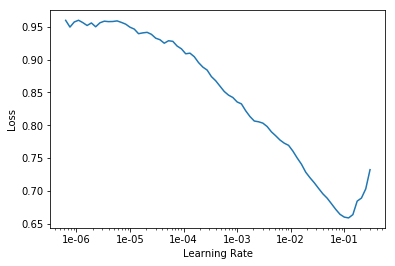

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(8,1e-2)

epoch,train_loss,valid_loss,auc_score,accuracy,time
0,0.215876,0.210624,0.969178,0.919191,06:23
1,0.215457,0.193649,0.974297,0.923100,03:39
2,0.199220,0.192422,0.979092,0.924918,03:36
3,0.181745,0.227217,0.974022,0.920441,03:39
4,0.158205,0.174667,0.980639,0.935598,03:36
5,0.145996,0.156018,0.983786,0.940916,03:39
6,0.132037,0.125662,0.989236,0.954119,03:37
7,0.137628,0.125684,0.989464,0.954937,03:39


In [18]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.0.weight", "0.1.weight", "0.1.bias", "0.1.running_mean", "0.1.running_var", "0.4.0.conv1.weight", "0.4.0.bn1.weight", "0.4.0.bn1.bias", "0.4.0.bn1.running_mean", "0.4.0.bn1.running_var", "0.4.0.conv2.weight", "0.4.0.bn2.weight", "0.4.0.bn2.bias", "0.4.0.bn2.running_mean", "0.4.0.bn2.running_var", "0.4.0.conv3.weight", "0.4.0.bn3.weight", "0.4.0.bn3.bias", "0.4.0.bn3.running_mean", "0.4.0.bn3.running_var", "0.4.0.downsample.0.weight", "0.4.0.downsample.1.weight", "0.4.0.downsample.1.bias", "0.4.0.downsample.1.running_mean", "0.4.0.downsample.1.running_var", "0.4.1.conv1.weight", "0.4.1.bn1.weight", "0.4.1.bn1.bias", "0.4.1.bn1.running_mean", "0.4.1.bn1.running_var", "0.4.1.conv2.weight", "0.4.1.bn2.weight", "0.4.1.bn2.bias", "0.4.1.bn2.running_mean", "0.4.1.bn2.running_var", "0.4.1.conv3.weight", "0.4.1.bn3.weight", "0.4.1.bn3.bias", "0.4.1.bn3.running_mean", "0.4.1.bn3.running_var", "0.4.2.conv1.weight", "0.4.2.bn1.weight", "0.4.2.bn1.bias", "0.4.2.bn1.running_mean", "0.4.2.bn1.running_var", "0.4.2.conv2.weight", "0.4.2.bn2.weight", "0.4.2.bn2.bias", "0.4.2.bn2.running_mean", "0.4.2.bn2.running_var", "0.4.2.conv3.weight", "0.4.2.bn3.weight", "0.4.2.bn3.bias", "0.4.2.bn3.running_mean", "0.4.2.bn3.running_var", "0.5.0.conv1.weight", "0.5.0.bn1.weight", "0.5.0.bn1.bias", "0.5.0.bn1.running_mean", "0.5.0.bn1.running_var", "0.5.0.conv2.weight", "0.5.0.bn2.weight", "0.5.0.bn2.bias", "0.5.0.bn2.running_mean", "0.5.0.bn2.running_var", "0.5.0.conv3.weight", "0.5.0.bn3.weight", "0.5.0.bn3.bias", "0.5.0.bn3.running_mean", "0.5.0.bn3.running_var", "0.5.0.downsample.0.weight", "0.5.0.downsample.1.weight", "0.5.0.downsample.1.bias", "0.5.0.downsample.1.running_mean", "0.5.0.downsample.1.running_var", "0.5.1.conv1.weight", "0.5.1.bn1.weight", "0.5.1.bn1.bias", "0.5.1.bn1.running_mean", "0.5.1.bn1.running_var", "0.5.1.conv2.weight", "0.5.1.bn2.weight", "0.5.1.bn2.bias", "0.5.1.bn2.running_mean", "0.5.1.bn2.running_var", "0.5.1.conv3.weight", "0.5.1.bn3.weight", "0.5.1.bn3.bias", "0.5.1.bn3.running_mean", "0.5.1.bn3.running_var", "0.5.2.conv1.weight", "0.5.2.bn1.weight", "0.5.2.bn1.bias", "0.5.2.bn1.running_mean", "0.5.2.bn1.running_var", "0.5.2.conv2.weight", "0.5.2.bn2.weight", "0.5.2.bn2.bias", "0.5.2.bn2.running_mean", "0.5.2.bn2.running_var", "0.5.2.conv3.weight", "0.5.2.bn3.weight", "0.5.2.bn3.bias", "0.5.2.bn3.running_mean", "0.5.2.bn3.running_var", "0.5.3.conv1.weight", "0.5.3.bn1.weight", "0.5.3.bn1.bias", "0.5.3.bn1.running_mean", "0.5.3.bn1.running_var", "0.5.3.conv2.weight", "0.5.3.bn2.weight", "0.5.3.bn2.bias", "0.5.3.bn2.running_mean", "0.5.3.bn2.running_var", "0.5.3.conv3.weight", "0.5.3.bn3.weight", "0.5.3.bn3.bias", "0.5.3.bn3.running_mean", "0.5.3.bn3.running_var", "0.6.0.conv1.weight", "0.6.0.bn1.weight", "0.6.0.bn1.bias", "0.6.0.bn1.running_mean", "0.6.0.bn1.running_var", "0.6.0.conv2.weight", "0.6.0.bn2.weight", "0.6.0.bn2.bias", "0.6.0.bn2.running_mean", "0.6.0.bn2.running_var", "0.6.0.conv3.weight", "0.6.0.bn3.weight", "0.6.0.bn3.bias", "0.6.0.bn3.running_mean", "0.6.0.bn3.running_var", "0.6.0.downsample.0.weight", "0.6.0.downsample.1.weight", "0.6.0.downsample.1.bias", "0.6.0.downsample.1.running_mean", "0.6.0.downsample.1.running_var", "0.6.1.conv1.weight", "0.6.1.bn1.weight", "0.6.1.bn1.bias", "0.6.1.bn1.running_mean", "0.6.1.bn1.running_var", "0.6.1.conv2.weight", "0.6.1.bn2.weight", "0.6.1.bn2.bias", "0.6.1.bn2.running_mean", "0.6.1.bn2.running_var", "0.6.1.conv3.weight", "0.6.1.bn3.weight", "0.6.1.bn3.bias", "0.6.1.bn3.running_mean", "0.6.1.bn3.running_var", "0.6.2.conv1.weight", "0.6.2.bn1.weight", "0.6.2.bn1.bias", "0.6.2.bn1.running_mean", "0.6.2.bn1.running_var", "0.6.2.conv2.weight", "0.6.2.bn2.weight", "0.6.2.bn2.bias", "0.6.2.bn2.running_mean", "0.6.2.bn2.running_var", "0.6.2.conv3.weight", "0.6.2.bn3.weight", "0.6.2.bn3.bias", "0.6.2.bn3.running_mean", "0.6.2.bn3.running_var", "0.6.3.conv1.weight", "0.6.3.bn1.weight", "0.6.3.bn1.bias", "0.6.3.bn1.running_mean", "0.6.3.bn1.running_var", "0.6.3.conv2.weight", "0.6.3.bn2.weight", "0.6.3.bn2.bias", "0.6.3.bn2.running_mean", "0.6.3.bn2.running_var", "0.6.3.conv3.weight", "0.6.3.bn3.weight", "0.6.3.bn3.bias", "0.6.3.bn3.running_mean", "0.6.3.bn3.running_var", "0.6.4.conv1.weight", "0.6.4.bn1.weight", "0.6.4.bn1.bias", "0.6.4.bn1.running_mean", "0.6.4.bn1.running_var", "0.6.4.conv2.weight", "0.6.4.bn2.weight", "0.6.4.bn2.bias", "0.6.4.bn2.running_mean", "0.6.4.bn2.running_var", "0.6.4.conv3.weight", "0.6.4.bn3.weight", "0.6.4.bn3.bias", "0.6.4.bn3.running_mean", "0.6.4.bn3.running_var", "0.6.5.conv1.weight", "0.6.5.bn1.weight", "0.6.5.bn1.bias", "0.6.5.bn1.running_mean", "0.6.5.bn1.running_var", "0.6.5.conv2.weight", "0.6.5.bn2.weight", "0.6.5.bn2.bias", "0.6.5.bn2.running_mean", "0.6.5.bn2.running_var", "0.6.5.conv3.weight", "0.6.5.bn3.weight", "0.6.5.bn3.bias", "0.6.5.bn3.running_mean", "0.6.5.bn3.running_var", "0.7.0.conv1.weight", "0.7.0.bn1.weight", "0.7.0.bn1.bias", "0.7.0.bn1.running_mean", "0.7.0.bn1.running_var", "0.7.0.conv2.weight", "0.7.0.bn2.weight", "0.7.0.bn2.bias", "0.7.0.bn2.running_mean", "0.7.0.bn2.running_var", "0.7.0.conv3.weight", "0.7.0.bn3.weight", "0.7.0.bn3.bias", "0.7.0.bn3.running_mean", "0.7.0.bn3.running_var", "0.7.0.downsample.0.weight", "0.7.0.downsample.1.weight", "0.7.0.downsample.1.bias", "0.7.0.downsample.1.running_mean", "0.7.0.downsample.1.running_var", "0.7.1.conv1.weight", "0.7.1.bn1.weight", "0.7.1.bn1.bias", "0.7.1.bn1.running_mean", "0.7.1.bn1.running_var", "0.7.1.conv2.weight", "0.7.1.bn2.weight", "0.7.1.bn2.bias", "0.7.1.bn2.running_mean", "0.7.1.bn2.running_var", "0.7.1.conv3.weight", "0.7.1.bn3.weight", "0.7.1.bn3.bias", "0.7.1.bn3.running_mean", "0.7.1.bn3.running_var", "0.7.2.conv1.weight", "0.7.2.bn1.weight", "0.7.2.bn1.bias", "0.7.2.bn1.running_mean", "0.7.2.bn1.running_var", "0.7.2.conv2.weight", "0.7.2.bn2.weight", "0.7.2.bn2.bias", "0.7.2.bn2.running_mean", "0.7.2.bn2.running_var", "0.7.2.conv3.weight", "0.7.2.bn3.weight", "0.7.2.bn3.bias", "0.7.2.bn3.running_mean", "0.7.2.bn3.running_var". 
	Unexpected key(s) in state_dict: "0.0.conv0.weight", "0.0.norm0.weight", "0.0.norm0.bias", "0.0.norm0.running_mean", "0.0.norm0.running_var", "0.0.norm0.num_batches_tracked", "0.0.denseblock1.denselayer1.norm1.weight", "0.0.denseblock1.denselayer1.norm1.bias", "0.0.denseblock1.denselayer1.norm1.running_mean", "0.0.denseblock1.denselayer1.norm1.running_var", "0.0.denseblock1.denselayer1.norm1.num_batches_tracked", "0.0.denseblock1.denselayer1.conv1.weight", "0.0.denseblock1.denselayer1.norm2.weight", "0.0.denseblock1.denselayer1.norm2.bias", "0.0.denseblock1.denselayer1.norm2.running_mean", "0.0.denseblock1.denselayer1.norm2.running_var", "0.0.denseblock1.denselayer1.norm2.num_batches_tracked", "0.0.denseblock1.denselayer1.conv2.weight", "0.0.denseblock1.denselayer2.norm1.weight", "0.0.denseblock1.denselayer2.norm1.bias", "0.0.denseblock1.denselayer2.norm1.running_mean", "0.0.denseblock1.denselayer2.norm1.running_var", "0.0.denseblock1.denselayer2.norm1.num_batches_tracked", "0.0.denseblock1.denselayer2.conv1.weight", "0.0.denseblock1.denselayer2.norm2.weight", "0.0.denseblock1.denselayer2.norm2.bias", "0.0.denseblock1.denselayer2.norm2.running_mean", "0.0.denseblock1.denselayer2.norm2.running_var", "0.0.denseblock1.denselayer2.norm2.num_batches_tracked", "0.0.denseblock1.denselayer2.conv2.weight", "0.0.denseblock1.denselayer3.norm1.weight", "0.0.denseblock1.denselayer3.norm1.bias", "0.0.denseblock1.denselayer3.norm1.running_mean", "0.0.denseblock1.denselayer3.norm1.running_var", "0.0.denseblock1.denselayer3.norm1.num_batches_tracked", "0.0.denseblock1.denselayer3.conv1.weight", "0.0.denseblock1.denselayer3.norm2.weight", "0.0.denseblock1.denselayer3.norm2.bias", "0.0.denseblock1.denselayer3.norm2.running_mean", "0.0.denseblock1.denselayer3.norm2.running_var", "0.0.denseblock1.denselayer3.norm2.num_batches_tracked", "0.0.denseblock1.denselayer3.conv2.weight", "0.0.denseblock1.denselayer4.norm1.weight", "0.0.denseblock1.denselayer4.norm1.bias", "0.0.denseblock1.denselayer4.norm1.running_mean", "0.0.denseblock1.denselayer4.norm1.running_var", "0.0.denseblock1.denselayer4.norm1.num_batches_tracked", "0.0.denseblock1.denselayer4.conv1.weight", "0.0.denseblock1.denselayer4.norm2.weight", "0.0.denseblock1.denselayer4.norm2.bias", "0.0.denseblock1.denselayer4.norm2.running_mean", "0.0.denseblock1.denselayer4.norm2.running_var", "0.0.denseblock1.denselayer4.norm2.num_batches_tracked", "0.0.denseblock1.denselayer4.conv2.weight", "0.0.denseblock1.denselayer5.norm1.weight", "0.0.denseblock1.denselayer5.norm1.bias", "0.0.denseblock1.denselayer5.norm1.running_mean", "0.0.denseblock1.denselayer5.norm1.running_var", "0.0.denseblock1.denselayer5.norm1.num_batches_tracked", "0.0.denseblock1.denselayer5.conv1.weight", "0.0.denseblock1.denselayer5.norm2.weight", "0.0.denseblock1.denselayer5.norm2.bias", "0.0.denseblock1.denselayer5.norm2.running_mean", "0.0.denseblock1.denselayer5.norm2.running_var", "0.0.denseblock1.denselayer5.norm2.num_batches_tracked", "0.0.denseblock1.denselayer5.conv2.weight", "0.0.denseblock1.denselayer6.norm1.weight", "0.0.denseblock1.denselayer6.norm1.bias", "0.0.denseblock1.denselayer6.norm1.running_mean", "0.0.denseblock1.denselayer6.norm1.running_var", "0.0.denseblock1.denselayer6.norm1.num_batches_tracked", "0.0.denseblock1.denselayer6.conv1.weight", "0.0.denseblock1.denselayer6.norm2.weight", "0.0.denseblock1.denselayer6.norm2.bias", "0.0.denseblock1.denselayer6.norm2.running_mean", "0.0.denseblock1.denselayer6.norm2.running_var", "0.0.denseblock1.denselayer6.norm2.num_batches_tracked", "0.0.denseblock1.denselayer6.conv2.weight", "0.0.transition1.norm.weight", "0.0.transition1.norm.bias", "0.0.transition1.norm.running_mean", "0.0.transition1.norm.running_var", "0.0.transition1.norm.num_batches_tracked", "0.0.transition1.conv.weight", "0.0.denseblock2.denselayer1.norm1.weight", "0.0.denseblock2.denselayer1.norm1.bias", "0.0.denseblock2.denselayer1.norm1.running_mean", "0.0.denseblock2.denselayer1.norm1.running_var", "0.0.denseblock2.denselayer1.norm1.num_batches_tracked", "0.0.denseblock2.denselayer1.conv1.weight", "0.0.denseblock2.denselayer1.norm2.weight", "0.0.denseblock2.denselayer1.norm2.bias", "0.0.denseblock2.denselayer1.norm2.running_mean", "0.0.denseblock2.denselayer1.norm2.running_var", "0.0.denseblock2.denselayer1.norm2.num_batches_tracked", "0.0.denseblock2.denselayer1.conv2.weight", "0.0.denseblock2.denselayer2.norm1.weight", "0.0.denseblock2.denselayer2.norm1.bias", "0.0.denseblock2.denselayer2.norm1.running_mean", "0.0.denseblock2.denselayer2.norm1.running_var", "0.0.denseblock2.denselayer2.norm1.num_batches_tracked", "0.0.denseblock2.denselayer2.conv1.weight", "0.0.denseblock2.denselayer2.norm2.weight", "0.0.denseblock2.denselayer2.norm2.bias", "0.0.denseblock2.denselayer2.norm2.running_mean", "0.0.denseblock2.denselayer2.norm2.running_var", "0.0.denseblock2.denselayer2.norm2.num_batches_tracked", "0.0.denseblock2.denselayer2.conv2.weight", "0.0.denseblock2.denselayer3.norm1.weight", "0.0.denseblock2.denselayer3.norm1.bias", "0.0.denseblock2.denselayer3.norm1.running_mean", "0.0.denseblock2.denselayer3.norm1.running_var", "0.0.denseblock2.denselayer3.norm1.num_batches_tracked", "0.0.denseblock2.denselayer3.conv1.weight", "0.0.denseblock2.denselayer3.norm2.weight", "0.0.denseblock2.denselayer3.norm2.bias", "0.0.denseblock2.denselayer3.norm2.running_mean", "0.0.denseblock2.denselayer3.norm2.running_var", "0.0.denseblock2.denselayer3.norm2.num_batches_tracked", "0.0.denseblock2.denselayer3.conv2.weight", "0.0.denseblock2.denselayer4.norm1.weight", "0.0.denseblock2.denselayer4.norm1.bias", "0.0.denseblock2.denselayer4.norm1.running_mean", "0.0.denseblock2.denselayer4.norm1.running_var", "0.0.denseblock2.denselayer4.norm1.num_batches_tracked", "0.0.denseblock2.denselayer4.conv1.weight", "0.0.denseblock2.denselayer4.norm2.weight", "0.0.denseblock2.denselayer4.norm2.bias", "0.0.denseblock2.denselayer4.norm2.running_mean", "0.0.denseblock2.denselayer4.norm2.running_var", "0.0.denseblock2.denselayer4.norm2.num_batches_tracked", "0.0.denseblock2.denselayer4.conv2.weight", "0.0.denseblock2.denselayer5.norm1.weight", "0.0.denseblock2.denselayer5.norm1.bias", "0.0.denseblock2.denselayer5.norm1.running_mean", "0.0.denseblock2.denselayer5.norm1.running_var", "0.0.denseblock2.denselayer5.norm1.num_batches_tracked", "0.0.denseblock2.denselayer5.conv1.weight", "0.0.denseblock2.denselayer5.norm2.weight", "0.0.denseblock2.denselayer5.norm2.bias", "0.0.denseblock2.denselayer5.norm2.running_mean", "0.0.denseblock2.denselayer5.norm2.running_var", "0.0.denseblock2.denselayer5.norm2.num_batches_tracked", "0.0.denseblock2.denselayer5.conv2.weight", "0.0.denseblock2.denselayer6.norm1.weight", "0.0.denseblock2.denselayer6.norm1.bias", "0.0.denseblock2.denselayer6.norm1.running_mean", "0.0.denseblock2.denselayer6.norm1.running_var", "0.0.denseblock2.denselayer6.norm1.num_batches_tracked", "0.0.denseblock2.denselayer6.conv1.weight", "0.0.denseblock2.denselayer6.norm2.weight", "0.0.denseblock2.denselayer6.norm2.bias", "0.0.denseblock2.denselayer6.norm2.running_mean", "0.0.denseblock2.denselayer6.norm2.running_var", "0.0.denseblock2.denselayer6.norm2.num_batches_tracked", "0.0.denseblock2.denselayer6.conv2.weight", "0.0.denseblock2.denselayer7.norm1.weight", "0.0.denseblock2.denselayer7.norm1.bias", "0.0.denseblock2.denselayer7.norm1.running_mean", "0.0.denseblock2.denselayer7.norm1.running_var", "0.0.denseblock2.denselayer7.norm1.num_batches_tracked", "0.0.denseblock2.denselayer7.conv1.weight", "0.0.denseblock2.denselayer7.norm2.weight", "0.0.denseblock2.denselayer7.norm2.bias", "0.0.denseblock2.denselayer7.norm2.running_mean", "0.0.denseblock2.denselayer7.norm2.running_var", "0.0.denseblock2.denselayer7.norm2.num_batches_tracked", "0.0.denseblock2.denselayer7.conv2.weight", "0.0.denseblock2.denselayer8.norm1.weight", "0.0.denseblock2.denselayer8.norm1.bias", "0.0.denseblock2.denselayer8.norm1.running_mean", "0.0.denseblock2.denselayer8.norm1.running_var", "0.0.denseblock2.denselayer8.norm1.num_batches_tracked", "0.0.denseblock2.denselayer8.conv1.weight", "0.0.denseblock2.denselayer8.norm2.weight", "0.0.denseblock2.denselayer8.norm2.bias", "0.0.denseblock2.denselayer8.norm2.running_mean", "0.0.denseblock2.denselayer8.norm2.running_var", "0.0.denseblock2.denselayer8.norm2.num_batches_tracked", "0.0.denseblock2.denselayer8.conv2.weight", "0.0.denseblock2.denselayer9.norm1.weight", "0.0.denseblock2.denselayer9.norm1.bias", "0.0.denseblock2.denselayer9.norm1.running_mean", "0.0.denseblock2.denselayer9.norm1.running_var", "0.0.denseblock2.denselayer9.norm1.num_batches_tracked", "0.0.denseblock2.denselayer9.conv1.weight", "0.0.denseblock2.denselayer9.norm2.weight", "0.0.denseblock2.denselayer9.norm2.bias", "0.0.denseblock2.denselayer9.norm2.running_mean", "0.0.denseblock2.denselayer9.norm2.running_var", "0.0.denseblock2.denselayer9.norm2.num_batches_tracked", "0.0.denseblock2.denselayer9.conv2.weight", "0.0.denseblock2.denselayer10.norm1.weight", "0.0.denseblock2.denselayer10.norm1.bias", "0.0.denseblock2.denselayer10.norm1.running_mean", "0.0.denseblock2.denselayer10.norm1.running_var", "0.0.denseblock2.denselayer10.norm1.num_batches_tracked", "0.0.denseblock2.denselayer10.conv1.weight", "0.0.denseblock2.denselayer10.norm2.weight", "0.0.denseblock2.denselayer10.norm2.bias", "0.0.denseblock2.denselayer10.norm2.running_mean", "0.0.denseblock2.denselayer10.norm2.running_var", "0.0.denseblock2.denselayer10.norm2.num_batches_tracked", "0.0.denseblock2.denselayer10.conv2.weight", "0.0.denseblock2.denselayer11.norm1.weight", "0.0.denseblock2.denselayer11.norm1.bias", "0.0.denseblock2.denselayer11.norm1.running_mean", "0.0.denseblock2.denselayer11.norm1.running_var", "0.0.denseblock2.denselayer11.norm1.num_batches_tracked", "0.0.denseblock2.denselayer11.conv1.weight", "0.0.denseblock2.denselayer11.norm2.weight", "0.0.denseblock2.denselayer11.norm2.bias", "0.0.denseblock2.denselayer11.norm2.running_mean", "0.0.denseblock2.denselayer11.norm2.running_var", "0.0.denseblock2.denselayer11.norm2.num_batches_tracked", "0.0.denseblock2.denselayer11.conv2.weight", "0.0.denseblock2.denselayer12.norm1.weight", "0.0.denseblock2.denselayer12.norm1.bias", "0.0.denseblock2.denselayer12.norm1.running_mean", "0.0.denseblock2.denselayer12.norm1.running_var", "0.0.denseblock2.denselayer12.norm1.num_batches_tracked", "0.0.denseblock2.denselayer12.conv1.weight", "0.0.denseblock2.denselayer12.norm2.weight", "0.0.denseblock2.denselayer12.norm2.bias", "0.0.denseblock2.denselayer12.norm2.running_mean", "0.0.denseblock2.denselayer12.norm2.running_var", "0.0.denseblock2.denselayer12.norm2.num_batches_tracked", "0.0.denseblock2.denselayer12.conv2.weight", "0.0.transition2.norm.weight", "0.0.transition2.norm.bias", "0.0.transition2.norm.running_mean", "0.0.transition2.norm.running_var", "0.0.transition2.norm.num_batches_tracked", "0.0.transition2.conv.weight", "0.0.denseblock3.denselayer1.norm1.weight", "0.0.denseblock3.denselayer1.norm1.bias", "0.0.denseblock3.denselayer1.norm1.running_mean", "0.0.denseblock3.denselayer1.norm1.running_var", "0.0.denseblock3.denselayer1.norm1.num_batches_tracked", "0.0.denseblock3.denselayer1.conv1.weight", "0.0.denseblock3.denselayer1.norm2.weight", "0.0.denseblock3.denselayer1.norm2.bias", "0.0.denseblock3.denselayer1.norm2.running_mean", "0.0.denseblock3.denselayer1.norm2.running_var", "0.0.denseblock3.denselayer1.norm2.num_batches_tracked", "0.0.denseblock3.denselayer1.conv2.weight", "0.0.denseblock3.denselayer2.norm1.weight", "0.0.denseblock3.denselayer2.norm1.bias", "0.0.denseblock3.denselayer2.norm1.running_mean", "0.0.denseblock3.denselayer2.norm1.running_var", "0.0.denseblock3.denselayer2.norm1.num_batches_tracked", "0.0.denseblock3.denselayer2.conv1.weight", "0.0.denseblock3.denselayer2.norm2.weight", "0.0.denseblock3.denselayer2.norm2.bias", "0.0.denseblock3.denselayer2.norm2.running_mean", "0.0.denseblock3.denselayer2.norm2.running_var", "0.0.denseblock3.denselayer2.norm2.num_batches_tracked", "0.0.denseblock3.denselayer2.conv2.weight", "0.0.denseblock3.denselayer3.norm1.weight", "0.0.denseblock3.denselayer3.norm1.bias", "0.0.denseblock3.denselayer3.norm1.running_mean", "0.0.denseblock3.denselayer3.norm1.running_var", "0.0.denseblock3.denselayer3.norm1.num_batches_tracked", "0.0.denseblock3.denselayer3.conv1.weight", "0.0.denseblock3.denselayer3.norm2.weight", "0.0.denseblock3.denselayer3.norm2.bias", "0.0.denseblock3.denselayer3.norm2.running_mean", "0.0.denseblock3.denselayer3.norm2.running_var", "0.0.denseblock3.denselayer3.norm2.num_batches_tracked", "0.0.denseblock3.denselayer3.conv2.weight", "0.0.denseblock3.denselayer4.norm1.weight", "0.0.denseblock3.denselayer4.norm1.bias", "0.0.denseblock3.denselayer4.norm1.running_mean", "0.0.denseblock3.denselayer4.norm1.running_var", "0.0.denseblock3.denselayer4.norm1.num_batches_tracked", "0.0.denseblock3.denselayer4.conv1.weight", "0.0.denseblock3.denselayer4.norm2.weight", "0.0.denseblock3.denselayer4.norm2.bias", "0.0.denseblock3.denselayer4.norm2.running_mean", "0.0.denseblock3.denselayer4.norm2.running_var", "0.0.denseblock3.denselayer4.norm2.num_batches_tracked", "0.0.denseblock3.denselayer4.conv2.weight", "0.0.denseblock3.denselayer5.norm1.weight", "0.0.denseblock3.denselayer5.norm1.bias", "0.0.denseblock3.denselayer5.norm1.running_mean", "0.0.denseblock3.denselayer5.norm1.running_var", "0.0.denseblock3.denselayer5.norm1.num_batches_tracked", "0.0.denseblock3.denselayer5.conv1.weight", "0.0.denseblock3.denselayer5.norm2.weight", "0.0.denseblock3.denselayer5.norm2.bias", "0.0.denseblock3.denselayer5.norm2.running_mean", "0.0.denseblock3.denselayer5.norm2.running_var", "0.0.denseblock3.denselayer5.norm2.num_batches_tracked", "0.0.denseblock3.denselayer5.conv2.weight", "0.0.denseblock3.denselayer6.norm1.weight", "0.0.denseblock3.denselayer6.norm1.bias", "0.0.denseblock3.denselayer6.norm1.running_mean", "0.0.denseblock3.denselayer6.norm1.running_var", "0.0.denseblock3.denselayer6.norm1.num_batches_tracked", "0.0.denseblock3.denselayer6.conv1.weight", "0.0.denseblock3.denselayer6.norm2.weight", "0.0.denseblock3.denselayer6.norm2.bias", "0.0.denseblock3.denselayer6.norm2.running_mean", "0.0.denseblock3.denselayer6.norm2.running_var", "0.0.denseblock3.denselayer6.norm2.num_batches_tracked", "0.0.denseblock3.denselayer6.conv2.weight", "0.0.denseblock3.denselayer7.norm1.weight", "0.0.denseblock3.denselayer7.norm1.bias", "0.0.denseblock3.denselayer7.norm1.running_mean", "0.0.denseblock3.denselayer7.norm1.running_var", "0.0.denseblock3.denselayer7.norm1.num_batches_tracked", "0.0.denseblock3.denselayer7.conv1.weight", "0.0.denseblock3.denselayer7.norm2.weight", "0.0.denseblock3.denselayer7.norm2.bias", "0.0.denseblock3.denselayer7.norm2.running_mean", "0.0.denseblock3.denselayer7.norm2.running_var", "0.0.denseblock3.denselayer7.norm2.num_batches_tracked", "0.0.denseblock3.denselayer7.conv2.weight", "0.0.denseblock3.denselayer8.norm1.weight", "0.0.denseblock3.denselayer8.norm1.bias", "0.0.denseblock3.denselayer8.norm1.running_mean", "0.0.denseblock3.denselayer8.norm1.running_var", "0.0.denseblock3.denselayer8.norm1.num_batches_tracked", "0.0.denseblock3.denselayer8.conv1.weight", "0.0.denseblock3.denselayer8.norm2.weight", "0.0.denseblock3.denselayer8.norm2.bias", "0.0.denseblock3.denselayer8.norm2.running_mean", "0.0.denseblock3.denselayer8.norm2.running_var", "0.0.denseblock3.denselayer8.norm2.num_batches_tracked", "0.0.denseblock3.denselayer8.conv2.weight", "0.0.denseblock3.denselayer9.norm1.weight", "0.0.denseblock3.denselayer9.norm1.bias", "0.0.denseblock3.denselayer9.norm1.running_mean", "0.0.denseblock3.denselayer9.norm1.running_var", "0.0.denseblock3.denselayer9.norm1.num_batches_tracked", "0.0.denseblock3.denselayer9.conv1.weight", "0.0.denseblock3.denselayer9.norm2.weight", "0.0.denseblock3.denselayer9.norm2.bias", "0.0.denseblock3.denselayer9.norm2.running_mean", "0.0.denseblock3.denselayer9.norm2.running_var", "0.0.denseblock3.denselayer9.norm2.num_batches_tracked", "0.0.denseblock3.denselayer9.conv2.weight", "0.0.denseblock3.denselayer10.norm1.weight", "0.0.denseblock3.denselayer10.norm1.bias", "0.0.denseblock3.denselayer10.norm1.running_mean", "0.0.denseblock3.denselayer10.norm1.running_var", "0.0.denseblock3.denselayer10.norm1.num_batches_tracked", "0.0.denseblock3.denselayer10.conv1.weight", "0.0.denseblock3.denselayer10.norm2.weight", "0.0.denseblock3.denselayer10.norm2.bias", "0.0.denseblock3.denselayer10.norm2.running_mean", "0.0.denseblock3.denselayer10.norm2.running_var", "0.0.denseblock3.denselayer10.norm2.num_batches_tracked", "0.0.denseblock3.denselayer10.conv2.weight", "0.0.denseblock3.denselayer11.norm1.weight", "0.0.denseblock3.denselayer11.norm1.bias", "0.0.denseblock3.denselayer11.norm1.running_mean", "0.0.denseblock3.denselayer11.norm1.running_var", "0.0.denseblock3.denselayer11.norm1.num_batches_tracked", "0.0.denseblock3.denselayer11.conv1.weight", "0.0.denseblock3.denselayer11.norm2.weight", "0.0.denseblock3.denselayer11.norm2.bias", "0.0.denseblock3.denselayer11.norm2.running_mean", "0.0.denseblock3.denselayer11.norm2.running_var", "0.0.denseblock3.denselayer11.norm2.num_batches_tracked", "0.0.denseblock3.denselayer11.conv2.weight", "0.0.denseblock3.denselayer12.norm1.weight", "0.0.denseblock3.denselayer12.norm1.bias", "0.0.denseblock3.denselayer12.norm1.running_mean", "0.0.denseblock3.denselayer12.norm1.running_var", "0.0.denseblock3.denselayer12.norm1.num_batches_tracked", "0.0.denseblock3.denselayer12.conv1.weight", "0.0.denseblock3.denselayer12.norm2.weight", "0.0.denseblock3.denselayer12.norm2.bias", "0.0.denseblock3.denselayer12.norm2.running_mean", "0.0.denseblock3.denselayer12.norm2.running_var", "0.0.denseblock3.denselayer12.norm2.num_batches_tracked", "0.0.denseblock3.denselayer12.conv2.weight", "0.0.denseblock3.denselayer13.norm1.weight", "0.0.denseblock3.denselayer13.norm1.bias", "0.0.denseblock3.denselayer13.norm1.running_mean", "0.0.denseblock3.denselayer13.norm1.running_var", "0.0.denseblock3.denselayer13.norm1.num_batches_tracked", "0.0.denseblock3.denselayer13.conv1.weight", "0.0.denseblock3.denselayer13.norm2.weight", "0.0.denseblock3.denselayer13.norm2.bias", "0.0.denseblock3.denselayer13.norm2.running_mean", "0.0.denseblock3.denselayer13.norm2.running_var", "0.0.denseblock3.denselayer13.norm2.num_batches_tracked", "0.0.denseblock3.denselayer13.conv2.weight", "0.0.denseblock3.denselayer14.norm1.weight", "0.0.denseblock3.denselayer14.norm1.bias", "0.0.denseblock3.denselayer14.norm1.running_mean", "0.0.denseblock3.denselayer14.norm1.running_var", "0.0.denseblock3.denselayer14.norm1.num_batches_tracked", "0.0.denseblock3.denselayer14.conv1.weight", "0.0.denseblock3.denselayer14.norm2.weight", "0.0.denseblock3.denselayer14.norm2.bias", "0.0.denseblock3.denselayer14.norm2.running_mean", "0.0.denseblock3.denselayer14.norm2.running_var", "0.0.denseblock3.denselayer14.norm2.num_batches_tracked", "0.0.denseblock3.denselayer14.conv2.weight", "0.0.denseblock3.denselayer15.norm1.weight", "0.0.denseblock3.denselayer15.norm1.bias", "0.0.denseblock3.denselayer15.norm1.running_mean", "0.0.denseblock3.denselayer15.norm1.running_var", "0.0.denseblock3.denselayer15.norm1.num_batches_tracked", "0.0.denseblock3.denselayer15.conv1.weight", "0.0.denseblock3.denselayer15.norm2.weight", "0.0.denseblock3.denselayer15.norm2.bias", "0.0.denseblock3.denselayer15.norm2.running_mean", "0.0.denseblock3.denselayer15.norm2.running_var", "0.0.denseblock3.denselayer15.norm2.num_batches_tracked", "0.0.denseblock3.denselayer15.conv2.weight", "0.0.denseblock3.denselayer16.norm1.weight", "0.0.denseblock3.denselayer16.norm1.bias", "0.0.denseblock3.denselayer16.norm1.running_mean", "0.0.denseblock3.denselayer16.norm1.running_var", "0.0.denseblock3.denselayer16.norm1.num_batches_tracked", "0.0.denseblock3.denselayer16.conv1.weight", "0.0.denseblock3.denselayer16.norm2.weight", "0.0.denseblock3.denselayer16.norm2.bias", "0.0.denseblock3.denselayer16.norm2.running_mean", "0.0.denseblock3.denselayer16.norm2.running_var", "0.0.denseblock3.denselayer16.norm2.num_batches_tracked", "0.0.denseblock3.denselayer16.conv2.weight", "0.0.denseblock3.denselayer17.norm1.weight", "0.0.denseblock3.denselayer17.norm1.bias", "0.0.denseblock3.denselayer17.norm1.running_mean", "0.0.denseblock3.denselayer17.norm1.running_var", "0.0.denseblock3.denselayer17.norm1.num_batches_tracked", "0.0.denseblock3.denselayer17.conv1.weight", "0.0.denseblock3.denselayer17.norm2.weight", "0.0.denseblock3.denselayer17.norm2.bias", "0.0.denseblock3.denselayer17.norm2.running_mean", "0.0.denseblock3.denselayer17.norm2.running_var", "0.0.denseblock3.denselayer17.norm2.num_batches_tracked", "0.0.denseblock3.denselayer17.conv2.weight", "0.0.denseblock3.denselayer18.norm1.weight", "0.0.denseblock3.denselayer18.norm1.bias", "0.0.denseblock3.denselayer18.norm1.running_mean", "0.0.denseblock3.denselayer18.norm1.running_var", "0.0.denseblock3.denselayer18.norm1.num_batches_tracked", "0.0.denseblock3.denselayer18.conv1.weight", "0.0.denseblock3.denselayer18.norm2.weight", "0.0.denseblock3.denselayer18.norm2.bias", "0.0.denseblock3.denselayer18.norm2.running_mean", "0.0.denseblock3.denselayer18.norm2.running_var", "0.0.denseblock3.denselayer18.norm2.num_batches_tracked", "0.0.denseblock3.denselayer18.conv2.weight", "0.0.denseblock3.denselayer19.norm1.weight", "0.0.denseblock3.denselayer19.norm1.bias", "0.0.denseblock3.denselayer19.norm1.running_mean", "0.0.denseblock3.denselayer19.norm1.running_var", "0.0.denseblock3.denselayer19.norm1.num_batches_tracked", "0.0.denseblock3.denselayer19.conv1.weight", "0.0.denseblock3.denselayer19.norm2.weight", "0.0.denseblock3.denselayer19.norm2.bias", "0.0.denseblock3.denselayer19.norm2.running_mean", "0.0.denseblock3.denselayer19.norm2.running_var", "0.0.denseblock3.denselayer19.norm2.num_batches_tracked", "0.0.denseblock3.denselayer19.conv2.weight", "0.0.denseblock3.denselayer20.norm1.weight", "0.0.denseblock3.denselayer20.norm1.bias", "0.0.denseblock3.denselayer20.norm1.running_mean", "0.0.denseblock3.denselayer20.norm1.running_var", "0.0.denseblock3.denselayer20.norm1.num_batches_tracked", "0.0.denseblock3.denselayer20.conv1.weight", "0.0.denseblock3.denselayer20.norm2.weight", "0.0.denseblock3.denselayer20.norm2.bias", "0.0.denseblock3.denselayer20.norm2.running_mean", "0.0.denseblock3.denselayer20.norm2.running_var", "0.0.denseblock3.denselayer20.norm2.num_batches_tracked", "0.0.denseblock3.denselayer20.conv2.weight", "0.0.denseblock3.denselayer21.norm1.weight", "0.0.denseblock3.denselayer21.norm1.bias", "0.0.denseblock3.denselayer21.norm1.running_mean", "0.0.denseblock3.denselayer21.norm1.running_var", "0.0.denseblock3.denselayer21.norm1.num_batches_tracked", "0.0.denseblock3.denselayer21.conv1.weight", "0.0.denseblock3.denselayer21.norm2.weight", "0.0.denseblock3.denselayer21.norm2.bias", "0.0.denseblock3.denselayer21.norm2.running_mean", "0.0.denseblock3.denselayer21.norm2.running_var", "0.0.denseblock3.denselayer21.norm2.num_batches_tracked", "0.0.denseblock3.denselayer21.conv2.weight", "0.0.denseblock3.denselayer22.norm1.weight", "0.0.denseblock3.denselayer22.norm1.bias", "0.0.denseblock3.denselayer22.norm1.running_mean", "0.0.denseblock3.denselayer22.norm1.running_var", "0.0.denseblock3.denselayer22.norm1.num_batches_tracked", "0.0.denseblock3.denselayer22.conv1.weight", "0.0.denseblock3.denselayer22.norm2.weight", "0.0.denseblock3.denselayer22.norm2.bias", "0.0.denseblock3.denselayer22.norm2.running_mean", "0.0.denseblock3.denselayer22.norm2.running_var", "0.0.denseblock3.denselayer22.norm2.num_batches_tracked", "0.0.denseblock3.denselayer22.conv2.weight", "0.0.denseblock3.denselayer23.norm1.weight", "0.0.denseblock3.denselayer23.norm1.bias", "0.0.denseblock3.denselayer23.norm1.running_mean", "0.0.denseblock3.denselayer23.norm1.running_var", "0.0.denseblock3.denselayer23.norm1.num_batches_tracked", "0.0.denseblock3.denselayer23.conv1.weight", "0.0.denseblock3.denselayer23.norm2.weight", "0.0.denseblock3.denselayer23.norm2.bias", "0.0.denseblock3.denselayer23.norm2.running_mean", "0.0.denseblock3.denselayer23.norm2.running_var", "0.0.denseblock3.denselayer23.norm2.num_batches_tracked", "0.0.denseblock3.denselayer23.conv2.weight", "0.0.denseblock3.denselayer24.norm1.weight", "0.0.denseblock3.denselayer24.norm1.bias", "0.0.denseblock3.denselayer24.norm1.running_mean", "0.0.denseblock3.denselayer24.norm1.running_var", "0.0.denseblock3.denselayer24.norm1.num_batches_tracked", "0.0.denseblock3.denselayer24.conv1.weight", "0.0.denseblock3.denselayer24.norm2.weight", "0.0.denseblock3.denselayer24.norm2.bias", "0.0.denseblock3.denselayer24.norm2.running_mean", "0.0.denseblock3.denselayer24.norm2.running_var", "0.0.denseblock3.denselayer24.norm2.num_batches_tracked", "0.0.denseblock3.denselayer24.conv2.weight", "0.0.transition3.norm.weight", "0.0.transition3.norm.bias", "0.0.transition3.norm.running_mean", "0.0.transition3.norm.running_var", "0.0.transition3.norm.num_batches_tracked", "0.0.transition3.conv.weight", "0.0.denseblock4.denselayer1.norm1.weight", "0.0.denseblock4.denselayer1.norm1.bias", "0.0.denseblock4.denselayer1.norm1.running_mean", "0.0.denseblock4.denselayer1.norm1.running_var", "0.0.denseblock4.denselayer1.norm1.num_batches_tracked", "0.0.denseblock4.denselayer1.conv1.weight", "0.0.denseblock4.denselayer1.norm2.weight", "0.0.denseblock4.denselayer1.norm2.bias", "0.0.denseblock4.denselayer1.norm2.running_mean", "0.0.denseblock4.denselayer1.norm2.running_var", "0.0.denseblock4.denselayer1.norm2.num_batches_tracked", "0.0.denseblock4.denselayer1.conv2.weight", "0.0.denseblock4.denselayer2.norm1.weight", "0.0.denseblock4.denselayer2.norm1.bias", "0.0.denseblock4.denselayer2.norm1.running_mean", "0.0.denseblock4.denselayer2.norm1.running_var", "0.0.denseblock4.denselayer2.norm1.num_batches_tracked", "0.0.denseblock4.denselayer2.conv1.weight", "0.0.denseblock4.denselayer2.norm2.weight", "0.0.denseblock4.denselayer2.norm2.bias", "0.0.denseblock4.denselayer2.norm2.running_mean", "0.0.denseblock4.denselayer2.norm2.running_var", "0.0.denseblock4.denselayer2.norm2.num_batches_tracked", "0.0.denseblock4.denselayer2.conv2.weight", "0.0.denseblock4.denselayer3.norm1.weight", "0.0.denseblock4.denselayer3.norm1.bias", "0.0.denseblock4.denselayer3.norm1.running_mean", "0.0.denseblock4.denselayer3.norm1.running_var", "0.0.denseblock4.denselayer3.norm1.num_batches_tracked", "0.0.denseblock4.denselayer3.conv1.weight", "0.0.denseblock4.denselayer3.norm2.weight", "0.0.denseblock4.denselayer3.norm2.bias", "0.0.denseblock4.denselayer3.norm2.running_mean", "0.0.denseblock4.denselayer3.norm2.running_var", "0.0.denseblock4.denselayer3.norm2.num_batches_tracked", "0.0.denseblock4.denselayer3.conv2.weight", "0.0.denseblock4.denselayer4.norm1.weight", "0.0.denseblock4.denselayer4.norm1.bias", "0.0.denseblock4.denselayer4.norm1.running_mean", "0.0.denseblock4.denselayer4.norm1.running_var", "0.0.denseblock4.denselayer4.norm1.num_batches_tracked", "0.0.denseblock4.denselayer4.conv1.weight", "0.0.denseblock4.denselayer4.norm2.weight", "0.0.denseblock4.denselayer4.norm2.bias", "0.0.denseblock4.denselayer4.norm2.running_mean", "0.0.denseblock4.denselayer4.norm2.running_var", "0.0.denseblock4.denselayer4.norm2.num_batches_tracked", "0.0.denseblock4.denselayer4.conv2.weight", "0.0.denseblock4.denselayer5.norm1.weight", "0.0.denseblock4.denselayer5.norm1.bias", "0.0.denseblock4.denselayer5.norm1.running_mean", "0.0.denseblock4.denselayer5.norm1.running_var", "0.0.denseblock4.denselayer5.norm1.num_batches_tracked", "0.0.denseblock4.denselayer5.conv1.weight", "0.0.denseblock4.denselayer5.norm2.weight", "0.0.denseblock4.denselayer5.norm2.bias", "0.0.denseblock4.denselayer5.norm2.running_mean", "0.0.denseblock4.denselayer5.norm2.running_var", "0.0.denseblock4.denselayer5.norm2.num_batches_tracked", "0.0.denseblock4.denselayer5.conv2.weight", "0.0.denseblock4.denselayer6.norm1.weight", "0.0.denseblock4.denselayer6.norm1.bias", "0.0.denseblock4.denselayer6.norm1.running_mean", "0.0.denseblock4.denselayer6.norm1.running_var", "0.0.denseblock4.denselayer6.norm1.num_batches_tracked", "0.0.denseblock4.denselayer6.conv1.weight", "0.0.denseblock4.denselayer6.norm2.weight", "0.0.denseblock4.denselayer6.norm2.bias", "0.0.denseblock4.denselayer6.norm2.running_mean", "0.0.denseblock4.denselayer6.norm2.running_var", "0.0.denseblock4.denselayer6.norm2.num_batches_tracked", "0.0.denseblock4.denselayer6.conv2.weight", "0.0.denseblock4.denselayer7.norm1.weight", "0.0.denseblock4.denselayer7.norm1.bias", "0.0.denseblock4.denselayer7.norm1.running_mean", "0.0.denseblock4.denselayer7.norm1.running_var", "0.0.denseblock4.denselayer7.norm1.num_batches_tracked", "0.0.denseblock4.denselayer7.conv1.weight", "0.0.denseblock4.denselayer7.norm2.weight", "0.0.denseblock4.denselayer7.norm2.bias", "0.0.denseblock4.denselayer7.norm2.running_mean", "0.0.denseblock4.denselayer7.norm2.running_var", "0.0.denseblock4.denselayer7.norm2.num_batches_tracked", "0.0.denseblock4.denselayer7.conv2.weight", "0.0.denseblock4.denselayer8.norm1.weight", "0.0.denseblock4.denselayer8.norm1.bias", "0.0.denseblock4.denselayer8.norm1.running_mean", "0.0.denseblock4.denselayer8.norm1.running_var", "0.0.denseblock4.denselayer8.norm1.num_batches_tracked", "0.0.denseblock4.denselayer8.conv1.weight", "0.0.denseblock4.denselayer8.norm2.weight", "0.0.denseblock4.denselayer8.norm2.bias", "0.0.denseblock4.denselayer8.norm2.running_mean", "0.0.denseblock4.denselayer8.norm2.running_var", "0.0.denseblock4.denselayer8.norm2.num_batches_tracked", "0.0.denseblock4.denselayer8.conv2.weight", "0.0.denseblock4.denselayer9.norm1.weight", "0.0.denseblock4.denselayer9.norm1.bias", "0.0.denseblock4.denselayer9.norm1.running_mean", "0.0.denseblock4.denselayer9.norm1.running_var", "0.0.denseblock4.denselayer9.norm1.num_batches_tracked", "0.0.denseblock4.denselayer9.conv1.weight", "0.0.denseblock4.denselayer9.norm2.weight", "0.0.denseblock4.denselayer9.norm2.bias", "0.0.denseblock4.denselayer9.norm2.running_mean", "0.0.denseblock4.denselayer9.norm2.running_var", "0.0.denseblock4.denselayer9.norm2.num_batches_tracked", "0.0.denseblock4.denselayer9.conv2.weight", "0.0.denseblock4.denselayer10.norm1.weight", "0.0.denseblock4.denselayer10.norm1.bias", "0.0.denseblock4.denselayer10.norm1.running_mean", "0.0.denseblock4.denselayer10.norm1.running_var", "0.0.denseblock4.denselayer10.norm1.num_batches_tracked", "0.0.denseblock4.denselayer10.conv1.weight", "0.0.denseblock4.denselayer10.norm2.weight", "0.0.denseblock4.denselayer10.norm2.bias", "0.0.denseblock4.denselayer10.norm2.running_mean", "0.0.denseblock4.denselayer10.norm2.running_var", "0.0.denseblock4.denselayer10.norm2.num_batches_tracked", "0.0.denseblock4.denselayer10.conv2.weight", "0.0.denseblock4.denselayer11.norm1.weight", "0.0.denseblock4.denselayer11.norm1.bias", "0.0.denseblock4.denselayer11.norm1.running_mean", "0.0.denseblock4.denselayer11.norm1.running_var", "0.0.denseblock4.denselayer11.norm1.num_batches_tracked", "0.0.denseblock4.denselayer11.conv1.weight", "0.0.denseblock4.denselayer11.norm2.weight", "0.0.denseblock4.denselayer11.norm2.bias", "0.0.denseblock4.denselayer11.norm2.running_mean", "0.0.denseblock4.denselayer11.norm2.running_var", "0.0.denseblock4.denselayer11.norm2.num_batches_tracked", "0.0.denseblock4.denselayer11.conv2.weight", "0.0.denseblock4.denselayer12.norm1.weight", "0.0.denseblock4.denselayer12.norm1.bias", "0.0.denseblock4.denselayer12.norm1.running_mean", "0.0.denseblock4.denselayer12.norm1.running_var", "0.0.denseblock4.denselayer12.norm1.num_batches_tracked", "0.0.denseblock4.denselayer12.conv1.weight", "0.0.denseblock4.denselayer12.norm2.weight", "0.0.denseblock4.denselayer12.norm2.bias", "0.0.denseblock4.denselayer12.norm2.running_mean", "0.0.denseblock4.denselayer12.norm2.running_var", "0.0.denseblock4.denselayer12.norm2.num_batches_tracked", "0.0.denseblock4.denselayer12.conv2.weight", "0.0.denseblock4.denselayer13.norm1.weight", "0.0.denseblock4.denselayer13.norm1.bias", "0.0.denseblock4.denselayer13.norm1.running_mean", "0.0.denseblock4.denselayer13.norm1.running_var", "0.0.denseblock4.denselayer13.norm1.num_batches_tracked", "0.0.denseblock4.denselayer13.conv1.weight", "0.0.denseblock4.denselayer13.norm2.weight", "0.0.denseblock4.denselayer13.norm2.bias", "0.0.denseblock4.denselayer13.norm2.running_mean", "0.0.denseblock4.denselayer13.norm2.running_var", "0.0.denseblock4.denselayer13.norm2.num_batches_tracked", "0.0.denseblock4.denselayer13.conv2.weight", "0.0.denseblock4.denselayer14.norm1.weight", "0.0.denseblock4.denselayer14.norm1.bias", "0.0.denseblock4.denselayer14.norm1.running_mean", "0.0.denseblock4.denselayer14.norm1.running_var", "0.0.denseblock4.denselayer14.norm1.num_batches_tracked", "0.0.denseblock4.denselayer14.conv1.weight", "0.0.denseblock4.denselayer14.norm2.weight", "0.0.denseblock4.denselayer14.norm2.bias", "0.0.denseblock4.denselayer14.norm2.running_mean", "0.0.denseblock4.denselayer14.norm2.running_var", "0.0.denseblock4.denselayer14.norm2.num_batches_tracked", "0.0.denseblock4.denselayer14.conv2.weight", "0.0.denseblock4.denselayer15.norm1.weight", "0.0.denseblock4.denselayer15.norm1.bias", "0.0.denseblock4.denselayer15.norm1.running_mean", "0.0.denseblock4.denselayer15.norm1.running_var", "0.0.denseblock4.denselayer15.norm1.num_batches_tracked", "0.0.denseblock4.denselayer15.conv1.weight", "0.0.denseblock4.denselayer15.norm2.weight", "0.0.denseblock4.denselayer15.norm2.bias", "0.0.denseblock4.denselayer15.norm2.running_mean", "0.0.denseblock4.denselayer15.norm2.running_var", "0.0.denseblock4.denselayer15.norm2.num_batches_tracked", "0.0.denseblock4.denselayer15.conv2.weight", "0.0.denseblock4.denselayer16.norm1.weight", "0.0.denseblock4.denselayer16.norm1.bias", "0.0.denseblock4.denselayer16.norm1.running_mean", "0.0.denseblock4.denselayer16.norm1.running_var", "0.0.denseblock4.denselayer16.norm1.num_batches_tracked", "0.0.denseblock4.denselayer16.conv1.weight", "0.0.denseblock4.denselayer16.norm2.weight", "0.0.denseblock4.denselayer16.norm2.bias", "0.0.denseblock4.denselayer16.norm2.running_mean", "0.0.denseblock4.denselayer16.norm2.running_var", "0.0.denseblock4.denselayer16.norm2.num_batches_tracked", "0.0.denseblock4.denselayer16.conv2.weight", "0.0.norm5.weight", "0.0.norm5.bias", "0.0.norm5.running_mean", "0.0.norm5.running_var", "0.0.norm5.num_batches_tracked". 
	size mismatch for 1.2.weight: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.2.bias: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.2.running_mean: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.2.running_var: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.4.weight: copying a param with shape torch.Size([512, 2048]) from checkpoint, the shape in current model is torch.Size([512, 4096]).

In [19]:
learn.fit_one_cycle(2,max_lr = slice(1e-5,1e-3))

epoch,train_loss,valid_loss,auc_score,accuracy,time
0,0.508188,0.473683,0.853287,0.782797,08:33
1,0.481128,0.462147,0.860520,0.787729,04:36


In [20]:
learn.save('stage-2')

In [26]:
preds,y = learn.TTA()
acc = accuracy(preds, y)
print('The validation accuracy is {} %.'.format(acc * 100))
pred_score = auc_score(preds,y).item()
print('The validation AUC is {}.'.format(pred_score))

The validation accuracy is 95.95954895019531 %.
The validation AUC is 0.990498960018158.


## Model interpretation

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

## Top losses with FP, TN

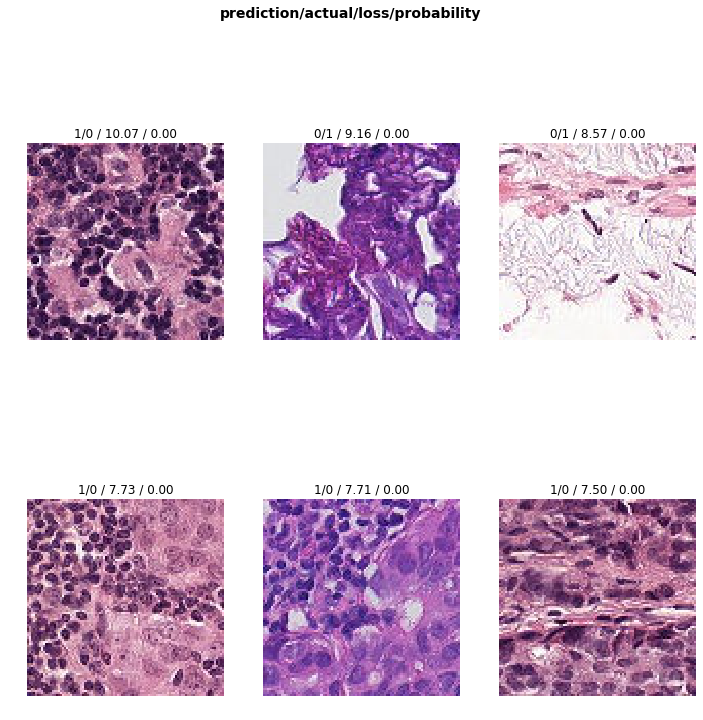

In [28]:
interp.plot_top_losses(6)

### Confusion Matrix

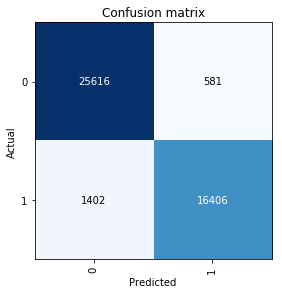

In [29]:
interp.plot_confusion_matrix()